#### Rum Yue

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

## Season 2008 - 2016
### Intermediate Data Visualization
#### Part I  Data Preparation

In [2]:
db = 'database.sqlite'
conn = sqlite3.connect(db)

In [3]:
ct = pd.read_sql_query("select * from Country", conn)
lg = pd.read_sql_query("select * from League", conn)
mtc = pd.read_sql_query("select * from Match", conn)
pl = pd.read_sql_query("select * from Player", conn)
pl_a = pd.read_sql_query("select * from Player_Attributes", conn)
seq = pd.read_sql_query("select * from sqlite_sequence", conn)
tm = pd.read_sql_query("select * from Team", conn)
tm_a = pd.read_sql_query("select * from Team_Attributes", conn)

we also plug in the geo coordinates data to match countries

In [4]:
lalo = pd.read_excel("fcll.xlsx", sheet_name="Sheet1")

In [5]:
lalo.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


Now we start with the merge of country and league data

And then combine with matches data

In [6]:
ct = ct.copy()
lg = lg.copy()

In [7]:
ct_lg = ct.merge(lg, left_on = 'id', right_on = 'id', how = 'outer')
ct_lg.head()

,id,name_x,country_id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A


In [8]:
ct_lg.drop(['id'], axis = 1, inplace = True)

In [9]:
ct_lg = ct_lg.rename(columns = {'name_x': 'country', 'name_y': 'league'})

In [10]:
mtc = mtc.copy()
mtc.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [11]:
mtcnew = mtc[['country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]

In [12]:
mtcnew['country_id'].unique()

array([    1,  1729,  4769,  7809, 10257, 13274, 15722, 17642, 19694,
       21518, 24558])

In [13]:
mdata = mtcnew.merge(ct_lg, left_on = 'country_id', right_on = 'country_id', how = 'outer')

In [14]:
# mdata.nunique()
mdata.isnull().sum()

country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
country             0
league              0
dtype: int64

In [15]:
mdata.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League


Plug in geographical info

In [15]:
ct_info = ct_lg.merge(lalo, left_on = 'country', right_on = 'name', how = 'left')
# why we do this?
# we merge columns by identical rows of 'country' in ct_lg and 'name' in lalo ---- 1 to 1 mapping to delete redundent rows

In [16]:
ct_info.head()

,country_x,country_id,league,country_y,latitude,longitude,name
0,Belgium,1,Belgium Jupiler League,BE,50.503887,4.469936,Belgium
1,England,1729,England Premier League,e,51.752000,1.257700,England
2,France,4769,France Ligue 1,FR,46.227638,2.213749,France
3,Germany,7809,Germany 1. Bundesliga,DE,51.165691,10.451526,Germany
4,Italy,10257,Italy Serie A,IT,41.871940,12.567380,Italy


In [17]:
ct_info.drop(['country_id', 'country_y', 'name'], axis = 1, inplace = True)
ct_info = ct_info.rename(columns = {'country_x': 'country'})

In [18]:
ct_info['country'].unique()

array(['Belgium', 'England', 'France', 'Germany', 'Italy', 'Netherlands',
       'Poland', 'Portugal', 'Scotland', 'Spain', 'Switzerland'],
      dtype=object)

In [19]:
import os
import conda

In [20]:
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = '/anaconda3/share/proj'

In [21]:
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


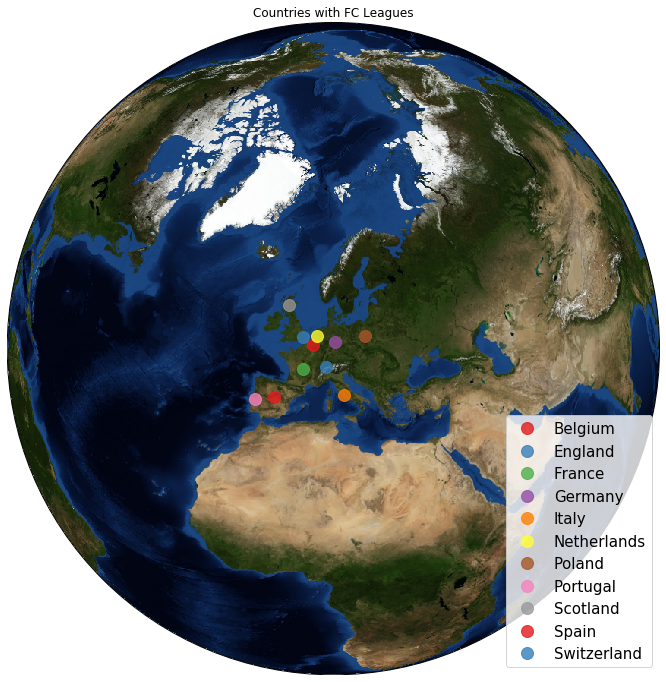

In [22]:
me = Basemap(projection = 'ortho', resolution = None, lat_0 = 50, lon_0 = 10, urcrnrlat = 80, llcrnrlat = -80)
plt.figure(figsize = (12, 12))
countr = list(ct_info['country'].unique())
c = sns.color_palette('Set1', n_colors = 11)
label = countr

def plfc(countr, c, label):
    lat = list(ct_info[ct_info['country'] == countr].latitude)
    lng = list(ct_info[ct_info['country'] == countr].longitude)
    x, y = me(lng, lat)
    me.plot(x, y, 'go', markersize = 12, color = j, alpha = 0.8, label = i)
    
for i, j in zip(countr, c):
    plfc(i, j, i)
    
me.bluemarble(scale = 0.5)
plt.legend(loc = 4, frameon = True, prop = {'size': 15}).get_frame().set_facecolor('white')
plt.title('Countries with FC Leagues')
plt.show()

In [23]:
import itertools

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


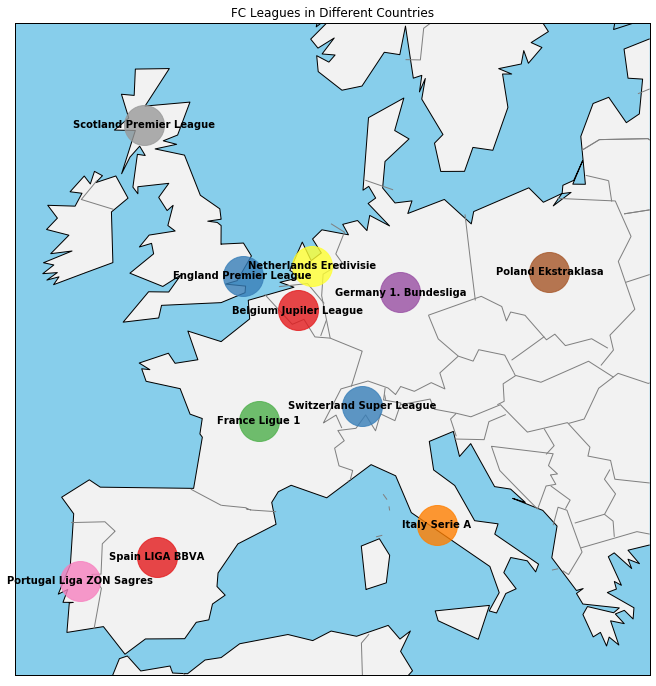

In [24]:
mc = Basemap(projection = 'merc', llcrnrlat = 35, urcrnrlat = 60, llcrnrlon = -12, urcrnrlon = 25, lat_ts = 20, lat_0 = True, lon_0 = True)

plt.figure(figsize = (18, 12))

mc.drawmapboundary(fill_color = 'skyblue', color = 'k', linewidth = 1)
mc.drawcoastlines(linewidth = 1)
mc.drawcountries(linewidth = 1, color = 'grey')
mc.fillcontinents(color = '#f2f2f2', alpha = 1, lake_color = 'b')

leag = list(ct_info['league'].unique())
c = sns.color_palette('Set1', 11)
lat = list(ct_info[ct_info['league'] == leag].latitude)
lng = list(ct_info[ct_info['league'] == leag].longitude)
x, y  = mc(lng, lat) 

def pleu(leag, c):
    lat = list(ct_info[ct_info['league'] == leag].latitude)
    lng = list(ct_info[ct_info['league'] == leag].longitude)
    x, y = mc(lng, lat)
    mc.plot(x, y, 'go', markersize = 40, color = j, alpha = 0.8, linewidth = 20)
    
for i, j in zip(leag, c):
    pleu(i, j)
        
for i, j, k in itertools.zip_longest(x, y, ct_info['league']):
    plt.text(i, j, k, fontsize = 10, color = 'k', horizontalalignment = 'center', verticalalignment = 'center', weight='bold')

plt.title('FC Leagues in Different Countries')
plt.show()

#### Matches played in different leagues

In [27]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 12 columns):
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
country             25979 non-null object
league              25979 non-null object
dtypes: int64(8), object(4)
memory usage: 2.6+ MB


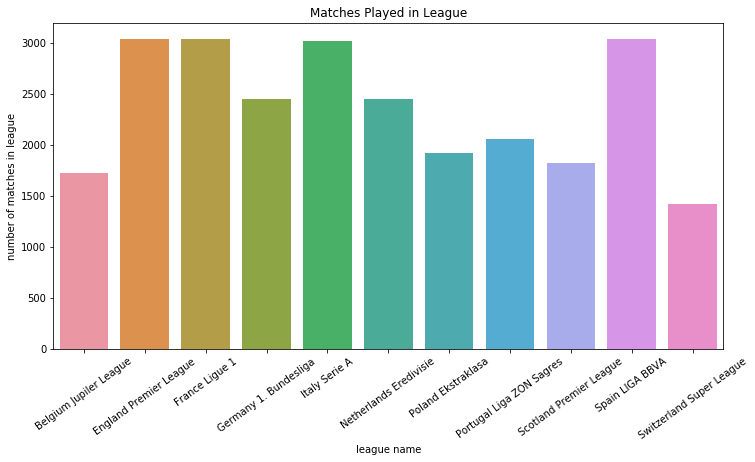

In [25]:
lg_names = ['Belgium Jupiler League', 'England Premier League',
       'France Ligue 1', 'Germany 1. Bundesliga', 'Italy Serie A',
       'Netherlands Eredivisie', 'Poland Ekstraklasa',
       'Portugal Liga ZON Sagres', 'Scotland Premier League',
       'Spain LIGA BBVA', 'Switzerland Super League']
plt.figure(figsize = (12, 6))
data_lg = mdata.groupby('league').aggregate({'league_id': 'count'}).reset_index()
sns.barplot(x = 'league', y = 'league_id', data = data_lg)
plt.title('Matches Played in League')
plt.xlabel('league name')
plt.xticks(range(0, 11), lg_names, rotation = 36)
plt.ylabel('number of matches in league')
plt.show()

Or

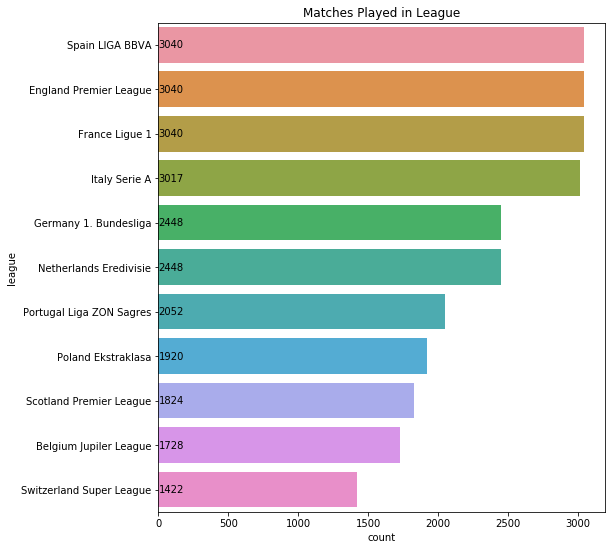

In [26]:
plt.figure(figsize = (8, 9))
cpt = sns.countplot(y = mdata['league'], order = mdata['league'].value_counts().index)
for i, j in enumerate(mdata['league'].value_counts().values):
    cpt.text(0.7, i, j, va = 'center')

plt.title('Matches Played in League')
plt.show()

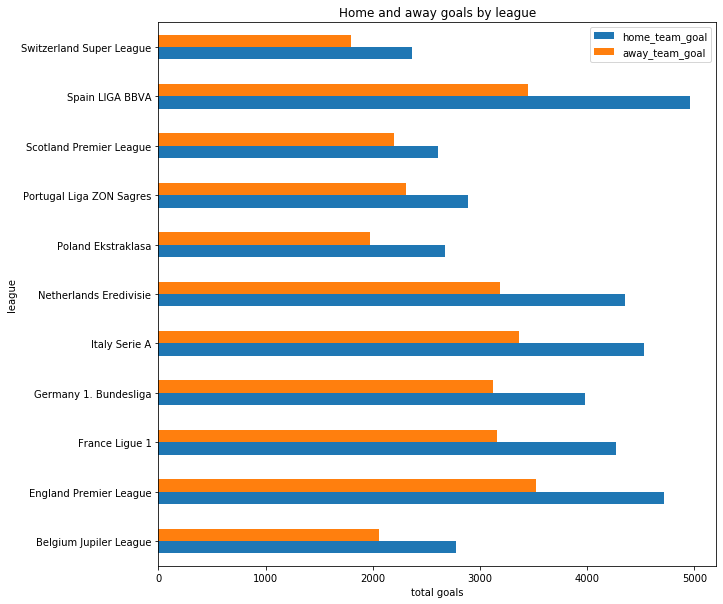

In [27]:
mdata.groupby('league').aggregate({'home_team_goal': 'sum', 'away_team_goal': 'sum'}).plot(kind = 'barh', figsize = (10,10))
                                                                                 
plt.title("Home and away goals by league")

plt.legend(loc = "best")
plt.xlabel("total goals")
plt.show()

In [28]:
# converting to date format
mdata['date'] = pd.to_datetime(mdata.date)

In [29]:
mdata['year'] = mdata.date.dt.year

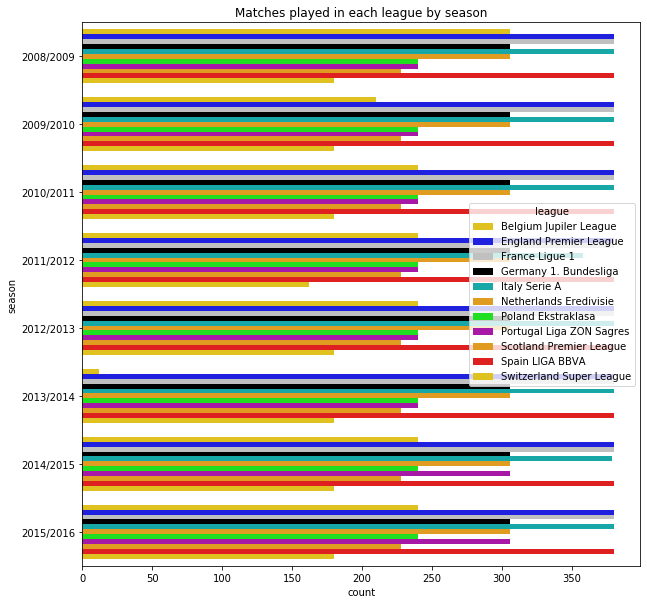

In [30]:
plt.figure(figsize=(10,10))

sns.countplot(y = mdata['season'], hue = mdata['league'], palette = ['gold', 'b', 'silver', 'k', 'c', 'orange', 'lime', 'm', 'orange', 'r'])
plt.title('Matches played in each league by season')
plt.show()

In [64]:
tm.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [73]:
mdata.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,2008,KRC Genk,GEN,Beerschot AC,BAC
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,2008,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,2008,KSV Cercle Brugge,CEB,RSC Anderlecht,AND
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,2008,KAA Gent,GEN,RAEC Mons,MON
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,2008,FCV Dender EH,DEN,Standard de Liège,STL


In [31]:
#Merge team data from sql
tm = tm.copy()
mdata = mdata.merge(tm, left_on = 'home_team_api_id', right_on = 'team_api_id', how = 'left')
# why we do this? fit the left_on and right_on in rows

In [32]:
mdata.drop(['id', 'team_api_id', 'team_fifa_api_id'], axis = 1, inplace = True)
mdata = mdata.rename(columns = {'team_long_name': 'home_team_lname', 'team_short_name': 'home_team_sname'})
mdata.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'country', 'league', 'year', 'home_team_lname',
       'home_team_sname'],
      dtype='object')

In [33]:
mdata = mdata.merge(tm, left_on = 'away_team_api_id', right_on = 'team_api_id', how = 'left')
mdata.drop(['id', 'team_api_id', 'team_fifa_api_id'], axis = 1, inplace = True)
mdata = mdata.rename(columns = {'team_long_name': 'away_team_lname', 'team_short_name': 'away_team_sname'})

European top fc by their home & away goals

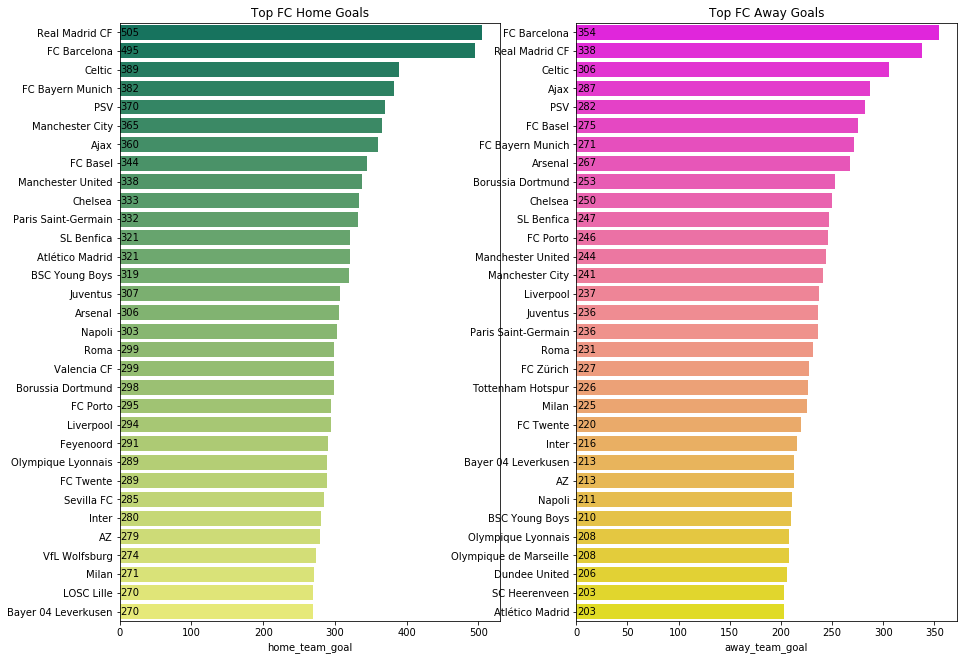

In [34]:
ht = mdata.groupby('home_team_lname')['home_team_goal'].sum().reset_index()
at = mdata.groupby('away_team_lname')['away_team_goal'].sum().reset_index()

ht = ht.sort_values(by = 'home_team_goal', ascending = False)
at = at.sort_values(by = 'away_team_goal', ascending = False)

plt.figure(figsize = (15, 11))
plt.subplot(121)
ax = sns.barplot(y = 'home_team_lname', x = 'home_team_goal', data = ht[:32], palette = 'summer')
plt.ylabel('')
plt.title('Top FC Home Goals')

for i, j in enumerate(ht['home_team_goal'][:32]):
    ax.text(0.7, i, j, va = 'center')
    
plt.subplot(122)
ax = sns.barplot(y = 'away_team_lname', x = 'away_team_goal', data = at[:32], palette = 'spring')
plt.ylabel('')
plt.title('Top FC Away Goals')

for i, j in enumerate(at['away_team_goal'][:32]):
    ax.text(0.7, i, j, va = 'center')

In [35]:
ht = ht.copy()
at = at.copy()
ht = ht.rename(columns = {'home_team_lname': 'team', 'home_team_goal': 'goals'})
at = at.rename(columns = {'away_team_lname': 'team', 'away_team_goal': 'goals'})

In [36]:
gl = pd.concat([ht, at])
gl = gl.groupby('team')['goals'].sum().reset_index().sort_values(by = 'goals', ascending = False)

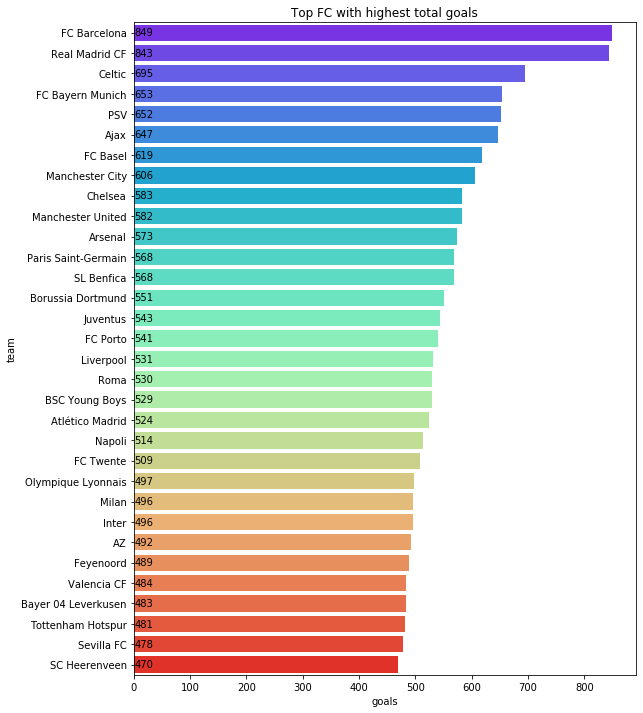

In [37]:
plt.figure(figsize = (9, 12))
ax = sns.barplot(y = 'team', x = 'goals', data = gl[:32], palette = 'rainbow')

for i, j in enumerate(gl['goals'][:32]):
    ax.text(0.7, i, j, va = 'center')
plt.title('Top FC with highest total goals')
plt.show()

matches played by teams throughout these years

In [38]:
x = mdata.groupby('home_team_lname').aggregate({'match_api_id': 'count'}).reset_index()
x = x.rename(columns = {'home_team_lname': 'team'})
y = mdata.groupby('away_team_lname').aggregate({'match_api_id': 'count'}).reset_index()
y = y.rename(columns = {'away_team_lname': 'team'})

In [46]:
tm_rk = pd.concat([x, y], axis = 0)

In [47]:
x.shape, y.shape, tm_rk.shape

((296, 2), (296, 2), (592, 2))

In [50]:
mtc_rk = tm_rk.groupby('team').aggregate({'match_api_id': 'sum'}).reset_index().sort_values(by = 'match_api_id', ascending = False)
mtc_rk = mtc_rk.rename(columns = {'match_api_id': 'matches played rank'})
mtc_rk[:20]

,team,matches played rank
51,Chelsea,304
22,Athletic Club de Bilbao,304
186,Paris Saint-Germain,304
256,Sunderland,304
180,Olympique de Marseille,304
179,Olympique Lyonnais,304
255,Stoke City,304
83,FC Lorient,304
273,Valencia CF,304
168,Málaga CF,304


Now we zoom in the network between top FC in ECL

In [51]:
tms = list(gl['team'][:40])
n = mdata[['home_team_lname', 'away_team_lname']]
n = n[(n['home_team_lname'].isin(tms)) & (n['away_team_lname'].isin(tms))]

In [55]:
import networkx as nx

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


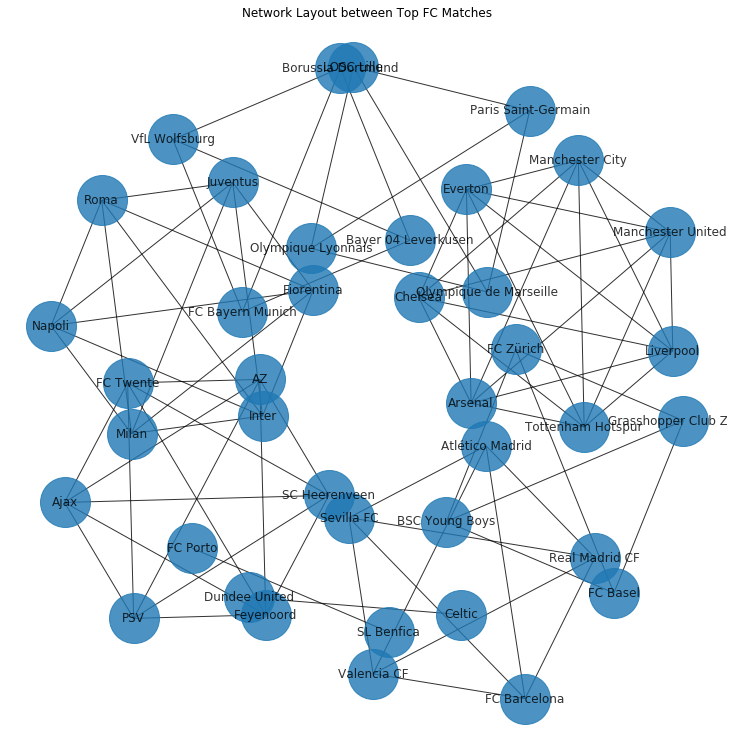

In [59]:
g = nx.from_pandas_edgelist(n, 'home_team_lname', 'away_team_lname')

plt.figure(figsize = (10, 10))
nx.draw_kamada_kawai(g, with_labels = True, node_size = 2500, nodecolor = 'b', alpha = 0.8)
plt.title('Network Layout between Top FC Matches')
plt.show()

Summary of Toal Goals by Year

In [64]:
mdata['total_goal'] = mdata['home_team_goal'] + mdata['away_team_goal']

In [74]:
#su = mdata.groupby('season')['total_goal'].sum()
#mea = mdata.groupby('season')['total_goal'].mean()
#std = mdata.groupby('season')['total_goal'].std()
#ma = mdata.groupby('season')['total_goal'].max()

In [78]:
### important!  to use merge function we should keep the object with DataFrame form not Series form
su = mdata.groupby('season').agg({'total_goal': 'sum'})
mea = mdata.groupby('season').agg({'total_goal': 'mean'})
std = mdata.groupby('season').agg({'total_goal': 'std'})
ma = mdata.groupby('season').agg({'total_goal': 'max'})

In [79]:
xx = su.merge(mea, left_index = True, right_index = True, how = 'left')
yy = std.merge(ma, left_index = True, right_index = True, how = 'left')
x_y = xx.merge(yy, left_index = True, right_index = True, how = 'left').reset_index()

In [83]:
x_y.head()

,season,goals,mean,std,max
0,2008/2009,8672,2.607336,1.627506,9
1,2009/2010,8632,2.672446,1.689001,12
2,2010/2011,8749,2.683742,1.656340,10
3,2011/2012,8747,2.716460,1.708132,10
4,2012/2013,9039,2.772699,1.695849,11


In [82]:
x_y = x_y.rename(columns = {'total_goal_x_x': 'goals', 'total_goal_y_x': 'mean', 'total_goal_x_y': 'std', 'total_goal_y_y': 'max'})

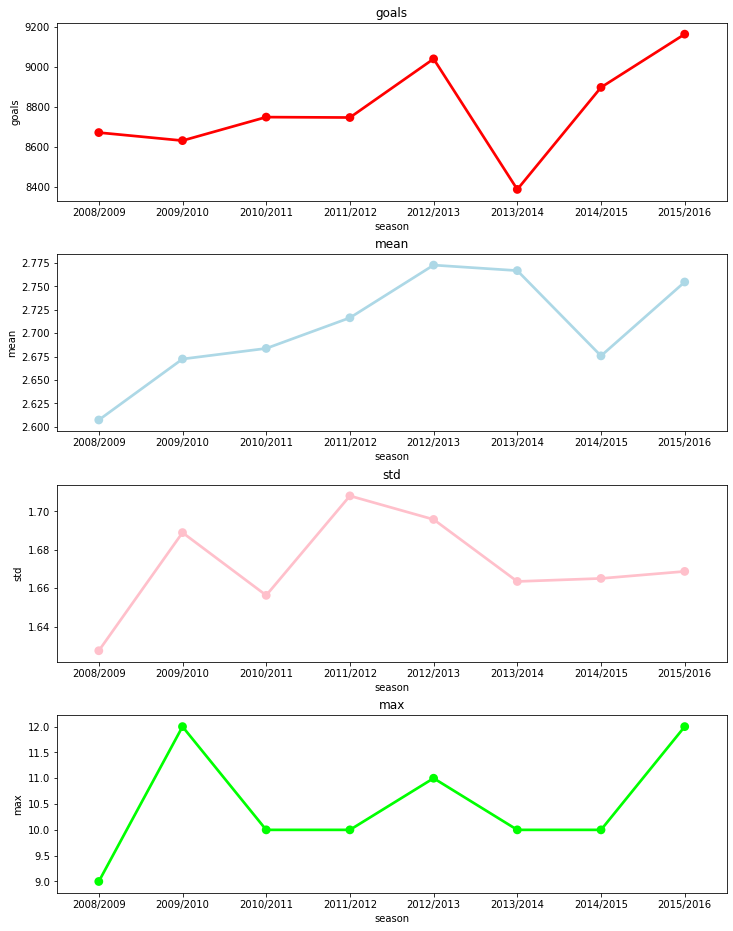

In [98]:
cl = x_y.columns[1:]
co = ['r', 'lightblue', 'pink', 'lime']

plt.figure(figsize = (12, 16))

for i, j ,k in itertools.zip_longest(cl, range(len(cl)), co):
    plt.subplot(len(cl), 1, j + 1)
    sns.pointplot(x_y['season'], x_y[i], color = k)
    plt.title(i)
    plt.subplots_adjust(hspace = 0.3)
plt.show()

Interactions between teams

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


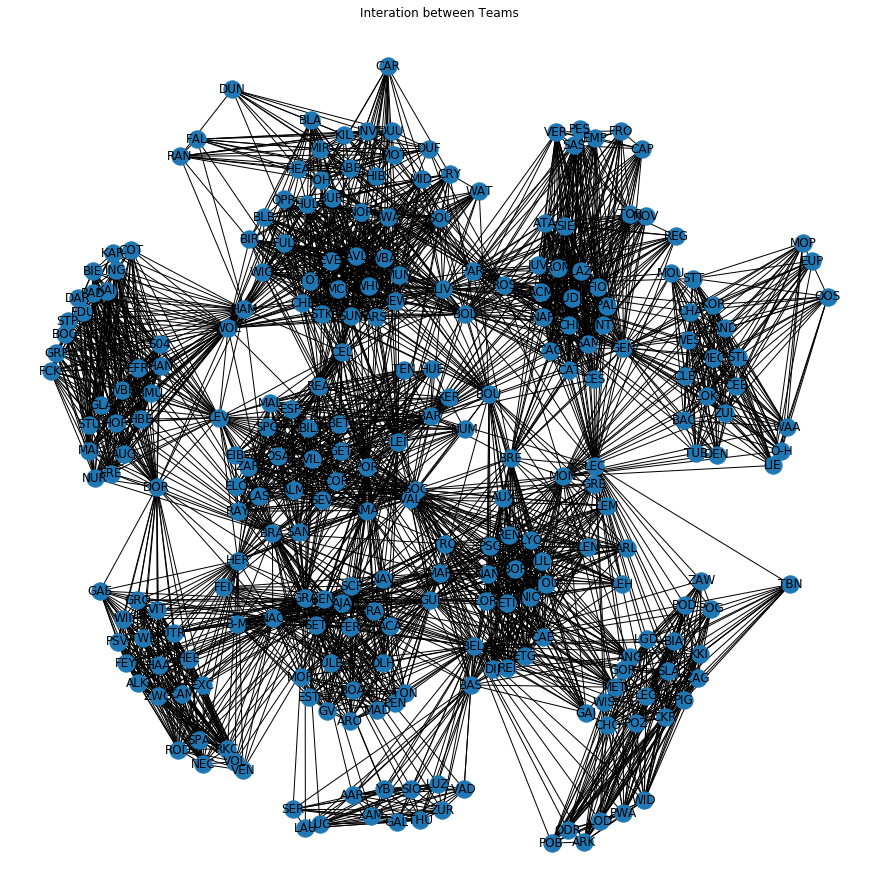

In [99]:
itt = nx.from_pandas_edgelist(mdata, 'home_team_sname', 'away_team_sname')
plt.figure(figsize = (12, 12))
nx.draw_kamada_kawai(itt, with_labels = True)
plt.title('Interation between Teams')
plt.show()

Now we create new features of winning info based on current columns

In [100]:
def lb(mdata):
    if mdata.home_team_goal > mdata.away_team_goal:
        return mdata['home_team_lname']
    elif mdata.home_team_goal < mdata.away_team_goal:
        return mdata['away_team_lname']
    elif mdata.home_team_goal == mdata.away_team_goal:
        return 'Draw'

In [101]:
mdata['win'] = mdata.apply(lambda mdata: lb(mdata), axis = 1)

In [103]:
def lbb(mdata):
    if mdata.home_team_goal > mdata.away_team_goal:
        return 'Home Team Win'
    elif mdata.home_team_goal < mdata.away_team_goal:
        return 'Away Team Win'
    elif mdata.home_team_goal == mdata.away_team_goal:
        return 'Draw'

In [104]:
mdata['outcome_side'] = mdata.apply(lambda mdata: lbb(mdata), axis = 1)

In [106]:
def lbbb(mdata):
    if mdata.home_team_goal > mdata.away_team_goal:
        return mdata['away_team_lname']
    elif mdata.home_team_goal < mdata.away_team_goal:
        return mdata['home_team_lname']
    elif mdata.home_team_goal == mdata.away_team_goal:
        return 'Draw'

In [107]:
mdata['lost'] = mdata.apply(lambda mdata: lbbb(mdata), axis = 1)

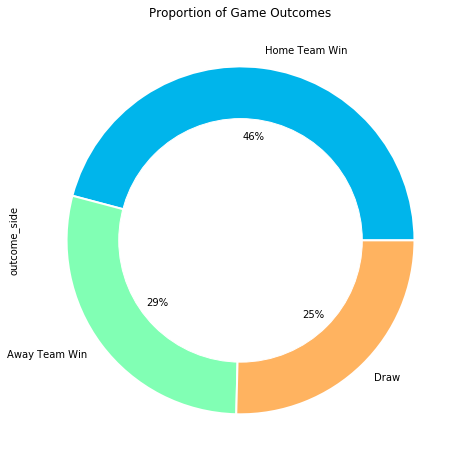

In [109]:
plt.figure(figsize=(8,8))
mdata['outcome_side'].value_counts().plot.pie(autopct = '%1.0f%%',
                                             colors = sns.color_palette('rainbow', 3),
                                             wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})

circ = plt.Circle((0,0), 0.7, color = 'white')

plt.gca().add_artist(circ)
plt.title("Proportion of Game Outcomes")
plt.show()

In [108]:
mdata.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,league,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname,total_goal,win,outcome_side,lost
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,...,Belgium Jupiler League,2008,KRC Genk,GEN,Beerschot AC,BAC,2,Draw,Draw,Draw
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,...,Belgium Jupiler League,2008,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,0,Draw,Draw,Draw
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,...,Belgium Jupiler League,2008,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,3,RSC Anderlecht,Away Team Win,KSV Cercle Brugge
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,...,Belgium Jupiler League,2008,KAA Gent,GEN,RAEC Mons,MON,5,KAA Gent,Home Team Win,RAEC Mons
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,...,Belgium Jupiler League,2008,FCV Dender EH,DEN,Standard de Liège,STL,4,Standard de Liège,Away Team Win,FCV Dender EH


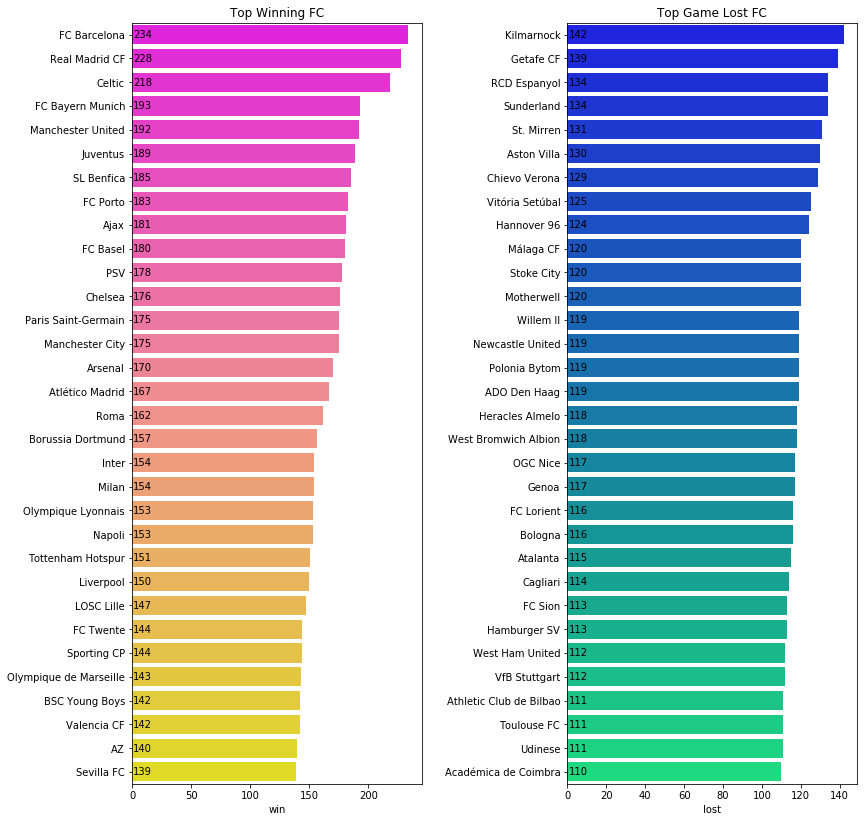

In [119]:
#values counts function will give the descending order of items in the list, the first (0th) position is 'Draw', therefore we have to rule it out
win = mdata['win'].value_counts()[1:].reset_index()
lost = mdata['lost'].value_counts()[1:].reset_index()
plt.figure(figsize = (13, 14))

plt.subplot(121)
# on x-axis is the number of game winning, on y-axis is the name of FC
ax = sns.barplot(win['win'][:32], win['index'][:32], palette = 'spring')
plt.title('Top Winning FC')
plt.ylabel('')
for i, j in enumerate(win['win'][:32]):
    ax.text(0.7, i, j, color = 'k', va = 'center')

    
plt.subplot(122)
ax = sns.barplot(lost['lost'][:32], lost['index'][:32], palette = 'winter')
plt.title('Top Game Lost FC')
plt.subplots_adjust(wspace = 0.5)
plt.ylabel('')
for i, j in enumerate(lost['lost'][:32]):
    ax.text(0.7, i, j, color = 'k', va = 'center')

plt.show()

In [121]:
win.head()

,index,win
0,FC Barcelona,234
1,Real Madrid CF,228
2,Celtic,218
3,FC Bayern Munich,193
4,Manchester United,192


Now we merge the w/l info of teams to matches

In [189]:
x = mdata.groupby(['home_team_lname', 'league']).agg({'match_api_id': 'count', 'home_team_goal': 'sum'}).reset_index()
y = mdata.groupby(['away_team_lname', 'league']).agg({'match_api_id': 'count', 'away_team_goal': 'sum'}).reset_index()

In [168]:
xy.head()

,team,league,matches,goals
75,FC Barcelona,Spain LIGA BBVA,304,849
211,Real Madrid CF,Spain LIGA BBVA,304,843
49,Celtic,Scotland Premier League,304,695
77,FC Bayern Munich,Germany 1. Bundesliga,272,653
184,PSV,Netherlands Eredivisie,272,652


In [190]:
x = x.rename(columns = {'home_team_lname': 'team', 'match_api_id': 'matches', 'home_team_goal': 'goals'})
y = y.rename(columns = {'away_team_lname': 'team', 'match_api_id': 'matches', 'away_team_goal': 'goals'})
xy = pd.concat([x, y])

In [191]:
xy = xy.groupby(['team', 'league'])[['matches', 'goals']].sum().reset_index()

In [192]:
xy = xy.sort_values(by = 'goals', ascending = False)

In [193]:
mwl = xy.merge(win, left_on = 'team', right_on = 'index', how = 'left')

In [202]:
mwl.head(10)

,team,league,matches,goals,win,lost,draw
0,FC Barcelona,Spain LIGA BBVA,304,849,234,27,12.0
1,Real Madrid CF,Spain LIGA BBVA,304,843,228,40,11.0
2,Celtic,Scotland Premier League,304,695,218,36,23.0
3,FC Bayern Munich,Germany 1. Bundesliga,272,653,193,35,14.0
4,PSV,Netherlands Eredivisie,272,652,178,47,18.0
5,Ajax,Netherlands Eredivisie,272,647,181,32,24.0
6,FC Basel,Switzerland Super League,286,619,180,42,26.0
7,Manchester City,England Premier League,304,606,175,68,18.0
8,Chelsea,England Premier League,304,583,176,58,34.0
9,Manchester United,England Premier League,304,582,192,55,16.0


In [195]:
mwl.drop(['index'], axis = 1, inplace = True)
mwl = mwl.merge(lost, left_on = 'team', right_on = 'index', how = 'left')
mwl.drop(['index'], axis = 1, inplace = True)

In [196]:
#take the two teams' names when draw happens
dr = mdata[mdata['outcome_side'] == 'Draw'][['home_team_lname', 'away_team_lname']]

In [197]:
l = dr['home_team_lname'].value_counts().reset_index()
v = dr['away_team_lname'].value_counts().reset_index()

In [198]:
l = l.rename(columns = {'index': 'team', 'home_team_lname': 'draw'})
v = v.rename(columns = {'index': 'team', 'away_team_lnmae': 'draw'})
lv = pd.concat([l, v])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [199]:
lv = lv.groupby('team')['draw'].sum().reset_index()
mwl = mwl.merge(lv, left_on = 'team', right_on = 'team', how = 'left')

In [200]:
mwl = mwl.sort_values(by = 'goals', ascending = False)

In [201]:
mwl = mwl.copy()

In [180]:
mwl.index = mwl.team

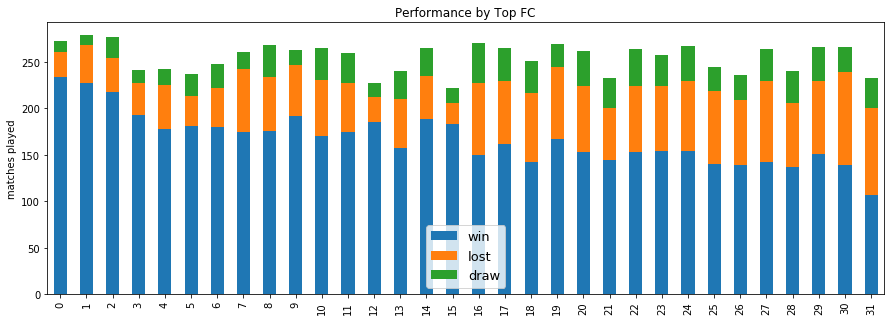

In [207]:
mwl[['win', 'lost', 'draw']][:32].plot(kind = 'bar', figsize = (15, 5), stacked = True)
plt.legend(loc = 'lower center', prop = {'size': 13})
plt.title('Performance by Top FC')
plt.ylabel('matches played')
plt.show()

### TO BE CONTINUED